In [2]:
import numpy as np
import pandas as pd

In [3]:
df_data = pd.read_csv('student_interest_responses.csv')

In [4]:
#rows and columns
df_data.shape

(60, 11)

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Q1        60 non-null     int64
 1   Q2        60 non-null     int64
 2   Q3        60 non-null     int64
 3   Q4        60 non-null     int64
 4   Q5        60 non-null     int64
 5   Q6        60 non-null     int64
 6   Q7        60 non-null     int64
 7   Q8        60 non-null     int64
 8   Q9        60 non-null     int64
 9   Q10       60 non-null     int64
 10  Interest  60 non-null     int64
dtypes: int64(11)
memory usage: 5.3 KB


In [6]:
df_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Interest
0,2,2,2,2,3,2,2,3,2,2,1
1,4,3,3,3,3,3,4,4,4,3,2
2,1,1,1,1,2,2,1,2,1,1,0
3,4,4,3,4,4,3,4,4,4,4,2
4,3,2,2,2,2,2,3,2,3,2,1


In [7]:
print(f"Interest:- {df_data['Interest'].unique()}")

Interest:- [1 2 0]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

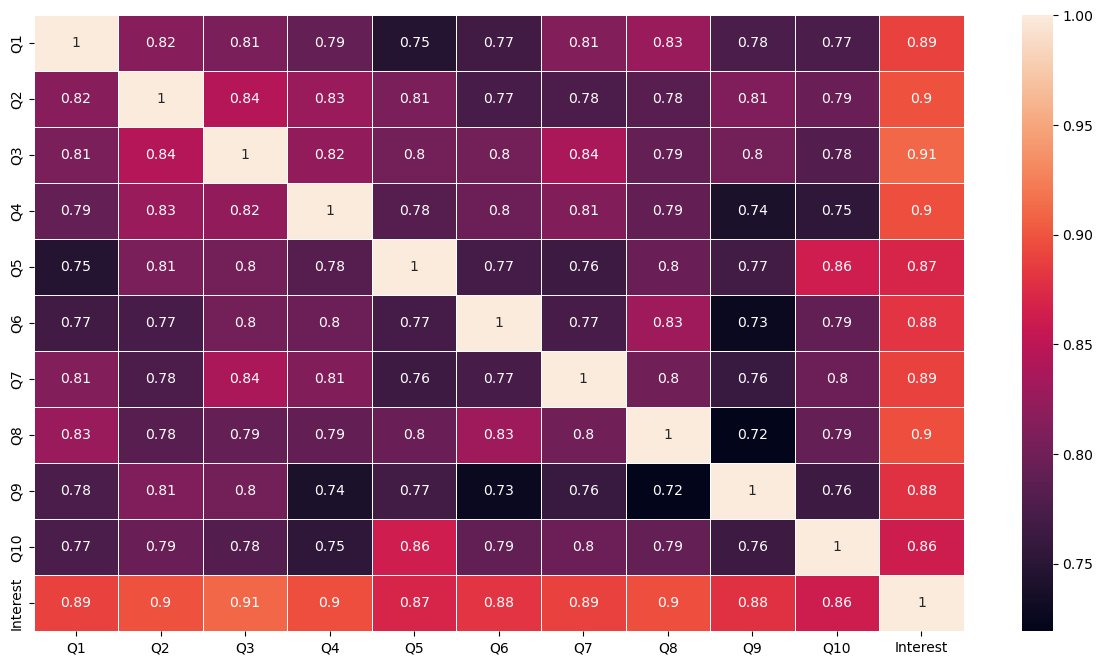

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df_data.corr(),annot=True, linewidths=0.5) #annot will annotate the values
plt.show()

In [10]:
target_corr = df_data.corr()['Interest'].abs().sort_values(ascending=False)[1:]
print(target_corr)

Q3     0.911081
Q2     0.898529
Q4     0.896650
Q8     0.896254
Q7     0.890162
Q1     0.890046
Q6     0.881119
Q9     0.879177
Q5     0.870220
Q10    0.861499
Name: Interest, dtype: float64


In [11]:
df_data['Interest'].value_counts()

Interest
0    23
2    20
1    17
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
X = df_data.drop('Interest', axis=1)
y = df_data['Interest']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25 ,random_state=25)

print(f"X train: {X_train.shape}")
print(f"X Test: {X_test.shape}")

X train: (45, 10)
X Test: (15, 10)


In [18]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
#training the ML
dct.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix

In [16]:


# Predict on test set
y_pred = dct.predict(X_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1-score
print("\nPrecision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

print("\nPrecision (Weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (Weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))



Confusion Matrix:
[[5 0 0]
 [1 5 0]
 [0 0 4]]

Accuracy: 0.9333333333333333

Precision (Macro): 0.9444444444444445
Recall (Macro): 0.9444444444444445
F1 Score (Macro): 0.9393939393939394

Precision (Weighted): 0.9444444444444445
Recall (Weighted): 0.9333333333333333
F1 Score (Weighted): 0.9333333333333333


In [38]:
import pandas as pd

# Column names from the training dataset
feature_names = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

# Input data
new_response = [[2, 2, 3, 2, 2, 2, 2, 2, 2, 2]]

# Convert to DataFrame with feature names
new_response_df = pd.DataFrame(new_response, columns=feature_names)

# Predict
prediction = dct.predict(new_response_df)

# Interpret the result
fields = ["Software Development", "Civil", "Construction"]
print(f"The student is interested in: {fields[prediction[0]]}")


The student is interested in: Software Development


In [39]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(dct, file)
